# 🎥✨ Netflix Data Analysis 🌟

## Project Overview
* This project aims to develop predictive models for the IMDb ratings of movies and TV series available on Netflix and build a recommendation system that suggests similar content based on user input. This dual approach not only provides insights into content quality as perceived through ratings but also enhances user experience by personalizing content suggestions.

## Dataset Introduction
* The dataset used in this analysis is the "Netflix Dataset for Analysis", which includes details about movies and TV shows such as the title, genre, premiere date, runtime, IMDb score, and language. It offers a comprehensive overview of content available on Netflix up to the date of the dataset's last update.

* You can access the dataset through this Kaggle link: https://www.kaggle.com/datasets/yaminh/netflix-dataset-for-analysis/data

## Value Proposition
* This analysis will benefit Kaggle users and the broader analytics community by:

* Developing a robust model to predict IMDb ratings, helping understand factors that influence viewer satisfaction.

* Creating a recommender system that suggests content based on user preferences, thereby personalizing viewer experiences.
* Providing actionable insights for content creators and distributors on optimizing their offerings to align with viewer preferences.

## Environment Setup and Data Loading

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualisation defaults
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv('/kaggle/input/netflix-dataset-for-analysis/netflix.csv')

# Display the first few rows of the dataframe
display(data.head())

# Display summary statistics and information about the dataset
display(data.describe(include='all'))
display(data.info())

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


,title,genre,language,imdb_score,premiere,runtime,year
count,583,583,583,583.000000,583,583.000000,583.000000
unique,583,114,38,NaN,386,NaN,NaN
top,Notes for My Son,Documentary,English,NaN,10/2/2020,NaN,NaN
freq,1,159,401,NaN,6,NaN,NaN
mean,NaN,NaN,NaN,6.275129,NaN,93.490566,2018.934820
std,NaN,NaN,NaN,0.976678,NaN,27.706665,1.474598
min,NaN,NaN,NaN,2.500000,NaN,4.000000,2014.000000
25%,NaN,NaN,NaN,5.700000,NaN,86.000000,2018.000000
50%,NaN,NaN,NaN,6.400000,NaN,97.000000,2019.000000
75%,NaN,NaN,NaN,7.000000,NaN,107.500000,2020.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


None

## Initial Data check

In [5]:
# Checking for missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_info = pd.DataFrame({'Count': missing_data, 'Percentage': missing_percentage})
print("Missing Data Information:")
print(missing_info)

# Checking for unique values in each column to understand the data better
print("\nUnique Values Information:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

Missing Data Information:
            Count  Percentage
title           0         0.0
genre           0         0.0
language        0         0.0
imdb_score      0         0.0
premiere        0         0.0
runtime         0         0.0
year            0         0.0

Unique Values Information:
title: 583 unique values
genre: 114 unique values
language: 38 unique values
imdb_score: 54 unique values
premiere: 386 unique values
runtime: 124 unique values
year: 8 unique values


 ## Data Exploration and Cleaning

In [7]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


None

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


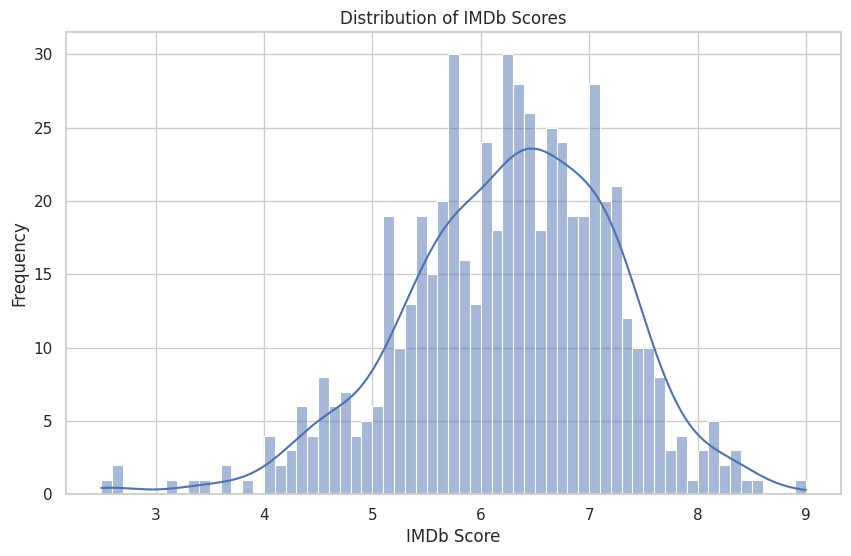

In [9]:
# Visualizing the distribution of IMDb scores
plt.figure(figsize=(10, 6))
sns.histplot(data['imdb_score'], kde=True, binwidth=0.1)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

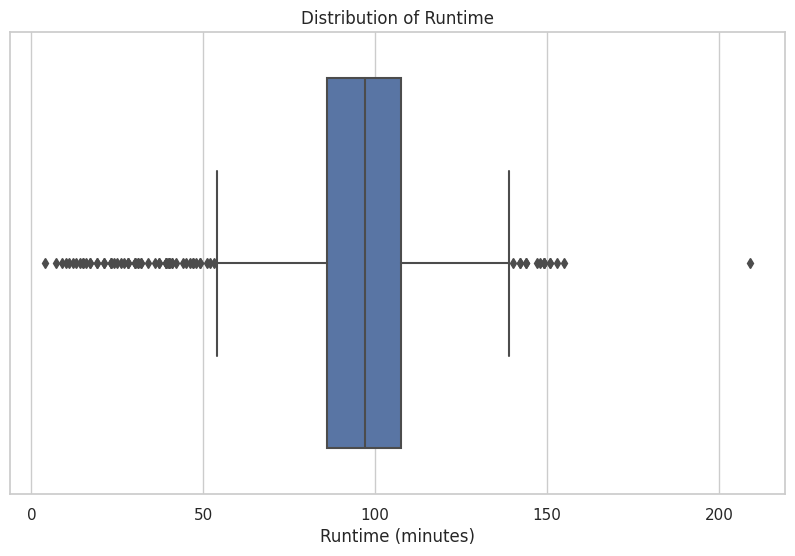

In [10]:
# Visualizing the distribution of runtimes
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['runtime'])
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

In [13]:
data.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


# Data cleaning

In [14]:
# Convert 'Premiere' to datetime format
data['premiere'] = pd.to_datetime(data['premiere'], errors='coerce')

In [15]:
# Checking for null values after conversion
print("Null values in 'Premiere' after conversion:", data['premiere'].isnull().sum())


Null values in 'Premiere' after conversion: 0


In [16]:
# Assuming 'Runtime' and 'IMDb Score' should not have nulls, we fill them with the median of the column
data['runtime'] = data['runtime'].fillna(data['runtime'].median())
data['imdb_score'] = data['imdb_score'].fillna(data['imdb_score'].median())


In [19]:
# Checking unique values for 'Genre' to spot inconsistencies
print(data['genre'].unique())


['Drama' 'Romantic comedy' 'Horror-thriller' 'Documentary' 'Comedy'
 'Comedy / Musical' 'Animation / Short' 'Action' 'Crime thriller' 'Horror'
 'Romance' 'Thriller' 'Action/Comedy' 'War' 'Concert Film' 'Variety show'
 'Comedy-drama' 'Musical/Western/Fantasy' 'Heist' 'Western'
 'Action/Science fiction' 'Dark comedy' 'Family film' 'Action comedy'
 'Romantic teen drama' 'One-man show' 'Animation' 'Drama / Short'
 'Action-thriller' 'Romantic drama' 'Biopic' 'Crime drama'
 'Heist film/Thriller' 'Science fiction' 'Coming-of-age comedy-drama'
 'Comedy/Horror' 'Science fiction/Thriller' 'Psychological thriller drama'
 'Spy thriller' 'Sports film' 'Comedy horror' 'Romantic comedy/Holiday'
 'Romantic teenage drama' 'Superhero/Action' 'Adventure'
 'Science fiction thriller' 'Musical / Short' 'Science fiction/Drama'
 'Family' 'Aftershow / Interview' 'Action thriller'
 'Animation/Musical/Adventure' 'Romantic comedy-drama' 'Fantasy'
 'Psychological thriller' 'Political thriller' 'Superhero'
 'Comedy

In [20]:
# Replacing typos and inconsistent data in 'Genre'
data['genre'] = data['genre'].str.replace('Sci-Fi', 'Science Fiction')
data['genre'] = data['genre'].str.replace('Documentary ', 'Documentary')  # Remove trailing spaces

In [21]:
# Re-checking unique values after cleaning
print(data['genre'].unique())

['Drama' 'Romantic comedy' 'Horror-thriller' 'Documentary' 'Comedy'
 'Comedy / Musical' 'Animation / Short' 'Action' 'Crime thriller' 'Horror'
 'Romance' 'Thriller' 'Action/Comedy' 'War' 'Concert Film' 'Variety show'
 'Comedy-drama' 'Musical/Western/Fantasy' 'Heist' 'Western'
 'Action/Science fiction' 'Dark comedy' 'Family film' 'Action comedy'
 'Romantic teen drama' 'One-man show' 'Animation' 'Drama / Short'
 'Action-thriller' 'Romantic drama' 'Biopic' 'Crime drama'
 'Heist film/Thriller' 'Science fiction' 'Coming-of-age comedy-drama'
 'Comedy/Horror' 'Science fiction/Thriller' 'Psychological thriller drama'
 'Spy thriller' 'Sports film' 'Comedy horror' 'Romantic comedy/Holiday'
 'Romantic teenage drama' 'Superhero/Action' 'Adventure'
 'Science fiction thriller' 'Musical / Short' 'Science fiction/Drama'
 'Family' 'Aftershow / Interview' 'Action thriller'
 'Animation/Musical/Adventure' 'Romantic comedy-drama' 'Fantasy'
 'Psychological thriller' 'Political thriller' 'Superhero'
 'Comedy

In [22]:
# Display the cleaned data as an interactive table
display(data.head())

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,2020-11-24,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,2018-06-24,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,2020-05-22,87,2020
3,The Perfection,Horror-thriller,English,6.1,2019-05-24,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,2018-03-30,78,2018


## Exploratory Data Analysis (EDA)

### Visual Analysis

* ### IMDb Score by Genre

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Create an aggregated DataFrame for average IMDb scores by genre
genre_imdb = data.groupby('genre')['imdb_score'].mean().reset_index().sort_values(by='imdb_score')

# Create an interactive bar plot
fig_genre = px.bar(genre_imdb, x='imdb_score', y='genre', orientation='h',
                   title="Average IMDb Score by Genre",
                   labels={'imdb_score': 'Average IMDb Score', 'genre': 'genre'},
                   color='imdb_score',
                   color_continuous_scale='Viridis')
fig_genre.show()

## IMDb Score Distribution by Language

In [27]:
# Enhance the interactive box plot for IMDb scores by language
fig_language = px.box(data, x='language', y='imdb_score', color='language',
                      notched=True, title="Distribution of IMDb Scores by Language",
                      labels={'imdb_score': 'imdb_score', 'language': 'language'})
fig_language.update_traces(quartilemethod="inclusive")  # Include all points in the box plot calculations
fig_language.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Relationship Between Runtime and IMDb Score

In [28]:
# Create an interactive scatter plot for runtime vs IMDb score
fig_runtime = px.scatter(data, x='runtime', y='imdb_score', color='genre',
                         title='Runtime vs. IMDb Score by Genre',
                         labels={'runtime': 'runtime (minutes)', 'imdb_score': 'imdb_score'},
                         hover_data=['title', 'premiere'])  # Additional hover data
fig_runtime.update_traces(marker=dict(size=10,
                                      line=dict(width=2,
                                                color='DarkSlateGrey')),
                          selector=dict(mode='markers'))
fig_runtime.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Conclusion
From the above visualizations, we can draw several insights:

* Genre Impact: Some genres like Documentaries tend to have higher average IMDb scores, suggesting a preference among viewers or a niche audience that rates these types of content favorably.

* Language Distribution: The variability in IMDb scores might be significant across different languages, indicating cultural differences in content reception or differing standards in content quality.

* Runtime Correlation: Preliminary visual analysis suggests that there might not be a strong linear correlation between runtime and IMDb score, but genre could be an important moderator in this relationship.